In [253]:
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [254]:
file_one = "Files/1_county_level_confirmed_cases.csv"

In [255]:
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_one_df.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-10-22 02:24:33 UTC,county,Alabama,Autauga,"Autauga, Alabama, US","1,001.00",32.54,-86.64,Medium metro,"55,200.00",2021,"3,661.23",30,54.35
1,2020-10-22 02:24:33 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US","1,003.00",30.73,-87.72,Small metro,"208,107.00",6443,"3,096.00",69,33.16
2,2020-10-22 02:24:33 UTC,county,Alabama,Barbour,"Barbour, Alabama, US","1,005.00",31.87,-85.39,Non-core,"25,782.00",996,"3,863.16",9,34.91
3,2020-10-22 02:24:33 UTC,county,Alabama,Bibb,"Bibb, Alabama, US","1,007.00",33.00,-87.13,Large fringe metro,"22,527.00",801,"3,555.73",14,62.15
4,2020-10-22 02:24:33 UTC,county,Alabama,Blount,"Blount, Alabama, US","1,009.00",33.98,-86.57,Large fringe metro,"57,645.00",1873,"3,249.20",25,43.37


In [256]:
# first edit to file one

clean_file_one_df = pd.DataFrame(file_one_df, columns= ['state','county_name','total_population','confirmed', 'deaths'])#, index = 1["CO"])
clean_file_one_df.head()

,state,county_name,total_population,confirmed,deaths
0,Alabama,Autauga,"55,200.00",2021,30
1,Alabama,Baldwin,"208,107.00",6443,69
2,Alabama,Barbour,"25,782.00",996,9
3,Alabama,Bibb,"22,527.00",801,14
4,Alabama,Blount,"57,645.00",1873,25


In [257]:
#add new row to help with future "join" of two dataframes #(second data frame has one more row than the first)

new_row = pd.DataFrame({'state':'', 'county_name':'', 'total_population':'', 
                        'confirmed':'', 'deaths':''}, index =[0])
new_row_df = pd.concat([new_row, df1[:]]).reset_index(drop = True) 
new_row_df.head()

,state,county_name,total_population,confirmed,deaths,State,County,LACCESS_POP15,LACCESS_LOWI15
0,,,,,,NaN,NaN,nan,nan
1,NaN,NaN,NaN,NaN,NaN,AL,Autauga,"17,496.69","6,543.68"
2,NaN,NaN,NaN,NaN,NaN,AL,Baldwin,"30,561.26","9,886.83"
3,NaN,NaN,NaN,NaN,NaN,AL,Barbour,"6,069.52","2,948.79"
4,NaN,NaN,NaN,NaN,NaN,AL,Bibb,969.38,596.16


In [258]:
colorado_df = new_row_df[new_row_df['state'].str.match('Colorado')]
colorado_df.head()

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
#access file
file_ACCESS = "Files/Copy of FoodEnvironmentAtlas - ACCESS.csv"
file_ACCESS_df = pd.read_csv(file_ACCESS, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1 = pd.DataFrame(file_ACCESS_df, columns= ['State','County','LACCESS_POP15','LACCESS_LOWI15'])

#rename columns 
renamed_df = df1.rename(columns={"LACCESS_POP15": "Low Access to Store","LACCESS_LOWI15":"Low Income Low Access to Store"})

#only output CO
colorado_df1 = renamed_df[renamed_df['State'].str.match('CO')]

#get rid of state and county columns
lowi_colorado_df = pd.DataFrame(colorado_df1, columns= ["County", "Low Access to Store","Low Income Low Access to Store"])
lowi_colorado_df.head()
# df1

In [ ]:
#combine data frames and rename columns

comb_df = colorado_df.join(lowi_colorado_df, lsuffix="deaths", rsuffix="Low Income Low Access to Store")

# drop last lines

comb_df1 = comb_df.drop(index=[3198,3212], columns="County")

# rename columns

renamed_df2 = comb_df1.rename(columns={"state": "State","county_name":"County","total_population":"Total Pop.","confirmed":"Confirmed","deaths":"Deaths"})
renamed_df2.head()

In [259]:
# #
# low_access_store = df1.groupby(["State"]).sum()["LACCESS_POP15"]

# confirmed_df = pd.DataFrame({"confirmed":confirmed})
# new_confirmed_df = confirmed_df.drop(index="Puerto Rico")
# new_confirmed_df = confirmed_df.reset_index()
# low_df = pd.DataFrame({"low access":low_access_store})

# low_df = low_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","IA":"Iowa","MS":"Mississippi","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NH":"New Hampshire","NY":"New York","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})
# low_df = low_df.sort_values(by = ["State"])

# low_df = low_df.reset_index()
# comb_d1f = confirmed_df.join(low_df, lsuffix="confirmed", rsuffix="low access")

# comb_d1f

In [260]:
# new_confirmed_df = confirmed_df.drop(index="Puerto Rico")
# new_confirmed_df

In [261]:
#access file
file_STORES = "Files/Copy of FoodEnvironmentAtlas - STORES.csv"
file_STORES_df = pd.read_csv(file_STORES, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1_STORES = pd.DataFrame(file_STORES_df, columns= ['State','County','GROC16','CONVS16'])

#rename columns 
renamed_df_STORES = df1_STORES.rename(columns={"GROC16": "# of Grocery Stores","CONVS16":"# of Convenient Stores"})

#only output CO
colorado_df1_STORES = renamed_df_STORES[renamed_df_STORES['State'].str.match('CO')]

#get rid of state and county columns
colorado_df2_STORES = pd.DataFrame(colorado_df1_STORES, columns= ["State","County", '# of Grocery Stores'])
colorado_df2_STORES["% Grocery Stores"]=""
colorado_df2_STORES.head()

,State,County,# of Grocery Stores,% Grocery Stores
244,CO,Adams,63,
245,CO,Alamosa,4,
246,CO,Arapahoe,95,
247,CO,Archuleta,3,
248,CO,Baca,1,


In [262]:
#access file
file_STORES = "Files/Copy of FoodEnvironmentAtlas - STORES.csv"
file_STORES_df = pd.read_csv(file_STORES, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1_STORES = pd.DataFrame(file_STORES_df, columns= ['State','County','GROC16','CONVS16'])

#rename columns 
renamed_df_STORES = df1_STORES.rename(columns={"GROC16": "# of Grocery Stores","CONVS16":"# of Convenient Stores"})

#only output CO
colorado_df1_STORES = renamed_df_STORES[renamed_df_STORES['State'].str.match('CO')]

#get rid of state and county columns
colorado_df2_STORES2 = pd.DataFrame(colorado_df1_STORES, columns= ["County", '# of Convenient Stores'])
colorado_df2_STORES2["% Convenient Stores"]=""
colorado_df2_STORES3 = colorado_df2_STORES2.drop(columns=['County'])
colorado_df2_STORES3.head()

,# of Convenient Stores,% Convenient Stores
244,125,
245,7,
246,158,
247,6,
248,3,


In [263]:
# join dataframes with empty columns
comb_STORES_df = colorado_df2_STORES.join(colorado_df2_STORES3, lsuffix="% Grocery Stores")

#divide to find %'s 
comb_STORES_df["% Grocery Stores"]=comb_STORES_df['# of Grocery Stores']/(comb_STORES_df['# of Grocery Stores'] + comb_STORES_df['# of Convenient Stores'])
comb_STORES_df["% Convenient Stores"]=comb_STORES_df['# of Convenient Stores']/(comb_STORES_df['# of Grocery Stores'] + comb_STORES_df['# of Convenient Stores'])

#drop county column
comb_STORES_df1 = comb_STORES_df.drop(columns=['County'])
comb_STORES_df1.head()

,State,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores
244,CO,63,0.34,125,0.66
245,CO,4,0.36,7,0.64
246,CO,95,0.38,158,0.62
247,CO,3,0.33,6,0.67
248,CO,1,0.25,3,0.75


In [264]:
# join the percent dataframe to other dataframe

comb_df2 = renamed_df2.join(comb_STORES_df1, lsuffix="Low Income Low Access to Store", rsuffix="# of Grocery Stores")
comb_df2.head()

,StateLow Income Low Access to Store,County,Total Pop.,Confirmed,Deaths,Low Access to Store,Low Income Low Access to Store,State# of Grocery Stores,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores
244,Colorado,Adams,"497,115.00",12408,249,"66,895.71","24,845.52",CO,63,0.34,125,0.66
245,Colorado,Alamosa,"16,444.00",292,9,915.19,405.35,CO,4,0.36,7,0.64
246,Colorado,Arapahoe,"636,671.00",11529,377,"69,481.67","13,732.22",CO,95,0.38,158,0.62
247,Colorado,Archuleta,"12,908.00",61,0,"3,600.90","1,289.72",CO,3,0.33,6,0.67
248,Colorado,Baca,"3,563.00",25,0,955.22,318.13,CO,1,0.25,3,0.75


In [265]:
#access file
file_HEALTH = "Files/Copy of FoodEnvironmentAtlas - HEALTH.csv"
file_HEALTH_df = pd.read_csv(file_HEALTH, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1_HEALTH = pd.DataFrame(file_HEALTH_df, columns= ['State','County','PCT_OBESE_ADULTS17'])

#rename columns 
renamed_df_HEALTH = df1_HEALTH.rename(columns={"PCT_OBESE_ADULTS17": "% of Obese Adults"})

#only output CO
colorado_df1_HEALTH = renamed_df_HEALTH[renamed_df_HEALTH['State'].str.match('CO')]
# colorado_df1_STORES

#get rid of state and county columns
colorado_df2_HEALTH = pd.DataFrame(colorado_df1_HEALTH, columns= ["County", "% of Obese Adults"])
colorado_df2_HEALTH2 = colorado_df2_HEALTH.drop(columns=['County'])
colorado_df2_HEALTH2.head()

,% of Obese Adults
244,22.60
245,22.60
246,22.60
247,22.60
248,22.60


In [266]:
# final join for colorado

comb_df3 = comb_df2.join(colorado_df2_HEALTH2, lsuffix="SPECS16", rsuffix="% of Obese Adults")
comb_df3.head()

,StateLow Income Low Access to Store,County,Total Pop.,Confirmed,Deaths,Low Access to Store,Low Income Low Access to Store,State# of Grocery Stores,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores,% of Obese Adults
244,Colorado,Adams,"497,115.00",12408,249,"66,895.71","24,845.52",CO,63,0.34,125,0.66,22.60
245,Colorado,Alamosa,"16,444.00",292,9,915.19,405.35,CO,4,0.36,7,0.64,22.60
246,Colorado,Arapahoe,"636,671.00",11529,377,"69,481.67","13,732.22",CO,95,0.38,158,0.62,22.60
247,Colorado,Archuleta,"12,908.00",61,0,"3,600.90","1,289.72",CO,3,0.33,6,0.67,22.60
248,Colorado,Baca,"3,563.00",25,0,955.22,318.13,CO,1,0.25,3,0.75,22.60


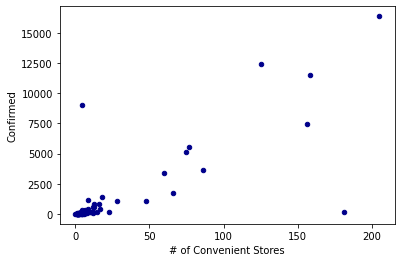

In [267]:
ax1 = comb_df3.plot.scatter(x='# of Convenient Stores',
                      y='Confirmed',
                      c='DarkBlue')

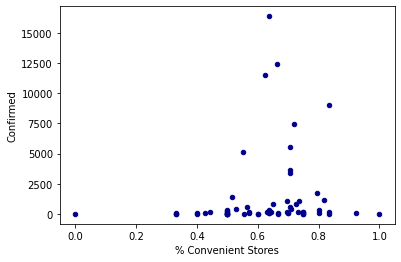

In [268]:
ax2 = comb_df3.plot.scatter(x='% Convenient Stores',
                        y='Confirmed',
                        c='DarkBlue')

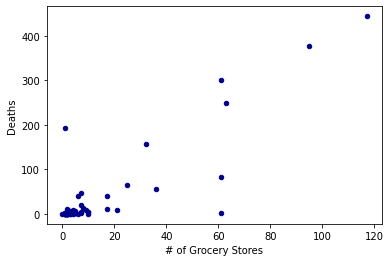

In [269]:
# scatter for # grocery stores compared to confirmed

ax3 = comb_df3.plot.scatter(x='# of Grocery Stores',
                        y='Deaths',
                        c='DarkBlue')

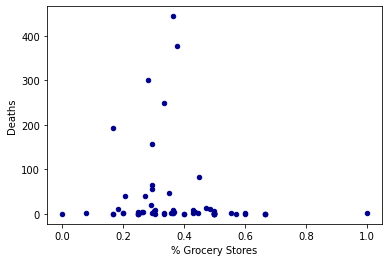

In [270]:
# scatter for % grocery stores compared to confirmed

ax4 = comb_df3.plot.scatter(x='% Grocery Stores',
                        y='Deaths',
                        c='DarkBlue')

In [271]:
# list from csv for each state CONFIRMED

confirmed = file_one_df.groupby(["state"]).sum()['confirmed']
con_df = pd.DataFrame(confirmed,columns=['confirmed'])
con_df.head()

,confirmed
state,
Alabama,175674
Alaska,11602
Arizona,233912
Arkansas,101596
California,886939


In [272]:
# list from csv for each state DEATHS

deaths = file_one_df.groupby(["state"]).sum()['deaths']
deaths_df = pd.DataFrame(deaths,columns=['deaths'])
deaths_df.head()

,deaths
state,
Alabama,2828
Alaska,68
Arizona,5854
Arkansas,1751
California,17170


In [273]:
# join two dataframes for sum of each state

comb_con_deaths_df = con_df.join(deaths_df, lsuffix="confirmed") 
comb_con_deaths_df.head()

,confirmed,deaths
state,,
Alabama,175674,2828
Alaska,11602,68
Arizona,233912,5854
Arkansas,101596,1751
California,886939,17170


In [274]:
# make dataframe for Low Access Population

low_access_store_state = df1.groupby(["State"]).sum()["LACCESS_POP15"]
low_access_store_state_df = pd.DataFrame(low_access_store_state,columns=['LACCESS_POP15'])
rename_low_access_df = low_access_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_low_access_df.head()

,LACCESS_POP15
State,
Alaska,"223,550.11"
Alabama,"962,910.89"
Arkansas,"587,921.07"
Arizona,"1,254,357.80"
California,"4,323,349.51"


In [275]:
# join confirmed/deaths and low access

comb_condeaths_laccess_df = comb_con_deaths_df.join(rename_low_access_df, lsuffix="deaths") 

# rename column LACCESS_POP15

renamed_comb_condeaths_laccess_df = comb_condeaths_laccess_df.rename(columns={"LACCESS_POP15": "Low Access to Store"})
renamed_comb_condeaths_laccess_df.head()

,confirmed,deaths,Low Access to Store
state,,,
Alabama,175674,2828,"962,910.89"
Alaska,11602,68,"223,550.11"
Arizona,233912,5854,"1,254,357.80"
Arkansas,101596,1751,"587,921.07"
California,886939,17170,"4,323,349.51"


In [276]:
# make dataframe for Low Access Low Income Population
low_access_lowi_store_state = df1.groupby(["State"]).sum()["LACCESS_LOWI15"]
low_access_lowi_store_state_df = pd.DataFrame(low_access_lowi_store_state,columns=['LACCESS_LOWI15'])
rename_low_lowi_access_df = low_access_lowi_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_low_lowi_access_df.head()

,LACCESS_LOWI15
State,
Alaska,"64,994.54"
Alabama,"378,623.20"
Arkansas,"254,969.90"
Arizona,"482,198.71"
California,"1,225,949.44"


In [277]:
# join confirmed/deaths and low access

comb_condeaths_laccesslowi_df = renamed_comb_condeaths_laccess_df.join(rename_low_lowi_access_df, lsuffix="Low Access Store") 

# rename column LACCESS_LOWI15

renamed_comb_condeaths_laccesslowi_df = comb_condeaths_laccesslowi_df.rename(columns={"LACCESS_LOWI15": "Low Access Low Income to Store"})
renamed_comb_condeaths_laccesslowi_df.head()

,confirmed,deaths,Low Access to Store,Low Access Low Income to Store
state,,,,
Alabama,175674,2828,"962,910.89","378,623.20"
Alaska,11602,68,"223,550.11","64,994.54"
Arizona,233912,5854,"1,254,357.80","482,198.71"
Arkansas,101596,1751,"587,921.07","254,969.90"
California,886939,17170,"4,323,349.51","1,225,949.44"


In [278]:
# make dataframe for Low Access Low Income Population
conv_store_state = renamed_df_STORES.groupby(["State"]).sum()["# of Convenient Stores"]
conv_store_state_df = pd.DataFrame(conv_store_state,columns=['# of Convenient Stores'])
conv_store_state_df["% Convenient Stores"]=""
rename_conv_store_state_df = conv_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_conv_store_state_df.head()

,# of Convenient Stores,% Convenient Stores
State,,
Alaska,173,
Alabama,3237,
Arkansas,1512,
Arizona,1903,
California,8949,


In [279]:
# make dataframe for Low Access Low Income Population
grocery_store_state = renamed_df_STORES.groupby(["State"]).sum()["# of Grocery Stores"]
grocery_store_state_df = pd.DataFrame(grocery_store_state,columns=['# of Grocery Stores'])
grocery_store_state_df["% Grocery Stores"]=""
rename_grocery_store_state_df = grocery_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_grocery_store_state_df.head()

,# of Grocery Stores,% Grocery Stores
State,,
Alaska,215,
Alabama,757,
Arkansas,480,
Arizona,786,
California,7874,


In [280]:
# join dataframes with empty columns
comb_STORES_state_df = rename_grocery_store_state_df.join(rename_conv_store_state_df, lsuffix="% Grocery Stores")

#divide to find %'s 
comb_STORES_state_df["% Grocery Stores"]=comb_STORES_state_df['# of Grocery Stores']/(comb_STORES_state_df['# of Grocery Stores'] + comb_STORES_state_df['# of Convenient Stores'])
comb_STORES_state_df["% Convenient Stores"]=comb_STORES_state_df['# of Convenient Stores']/(comb_STORES_state_df['# of Grocery Stores'] + comb_STORES_state_df['# of Convenient Stores'])

comb_STORES_state_df.head()


,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores
State,,,,
Alaska,215,0.55,173,0.45
Alabama,757,0.19,3237,0.81
Arkansas,480,0.24,1512,0.76
Arizona,786,0.29,1903,0.71
California,7874,0.47,8949,0.53


In [281]:
# join confirmed/deaths and store info

comb_condeaths_stores_df = renamed_comb_condeaths_laccesslowi_df.join(comb_STORES_state_df, lsuffix="Low Access Low Income to Store") 
comb_condeaths_stores_df.head()

,confirmed,deaths,Low Access to Store,Low Access Low Income to Store,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores
state,,,,,,,,
Alabama,175674,2828,"962,910.89","378,623.20",757.00,0.19,"3,237.00",0.81
Alaska,11602,68,"223,550.11","64,994.54",215.00,0.55,173.00,0.45
Arizona,233912,5854,"1,254,357.80","482,198.71",786.00,0.29,"1,903.00",0.71
Arkansas,101596,1751,"587,921.07","254,969.90",480.00,0.24,"1,512.00",0.76
California,886939,17170,"4,323,349.51","1,225,949.44","7,874.00",0.47,"8,949.00",0.53


In [282]:
# make dataframe for Low Access obesity Population
obesity_state = df1_HEALTH.groupby(["State"]).mean()["PCT_OBESE_ADULTS17"]
obesity_state_df = pd.DataFrame(obesity_state,columns=['PCT_OBESE_ADULTS17'])
rename_obesity_state_df = obesity_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_obesity_state_df.head()

,PCT_OBESE_ADULTS17
State,
Alaska,34.20
Alabama,36.30
Arkansas,35.00
Arizona,29.50
California,25.10


In [283]:
# join confirmed/deaths and obesity rates

comb_condeaths_all_df = rename_obesity_state_df.join(comb_condeaths_stores_df,lsuffix="% Convenient Stores")

# move rows to match colorado df

comb_condeaths_all_df = comb_condeaths_all_df[['confirmed', 'deaths', 'Low Access to Store', 'Low Access Low Income to Store',"# of Grocery Stores","% Grocery Stores","# of Convenient Stores","% Convenient Stores","PCT_OBESE_ADULTS17"]]

# 

comb_condeaths_all_df = comb_condeaths_all_df.rename(columns={"PCT_OBESE_ADULTS17":"% of Obese Adults"})
comb_condeaths_all_df.head()

,confirmed,deaths,Low Access to Store,Low Access Low Income to Store,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores,% of Obese Adults
State,,,,,,,,,
Alaska,11602,68,"223,550.11","64,994.54",215.00,0.55,173.00,0.45,34.20
Alabama,175674,2828,"962,910.89","378,623.20",757.00,0.19,"3,237.00",0.81,36.30
Arkansas,101596,1751,"587,921.07","254,969.90",480.00,0.24,"1,512.00",0.76,35.00
Arizona,233912,5854,"1,254,357.80","482,198.71",786.00,0.29,"1,903.00",0.71,29.50
California,886939,17170,"4,323,349.51","1,225,949.44","7,874.00",0.47,"8,949.00",0.53,25.10


In [285]:
def create_scatter(x_values, y_values, title, xlabel, ylabel, alpha):
    plt.scatter(x_values, y_values, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
    plt.plot(x_values, x_values * slope + intercept)
    print(f"r-squared: {round(r_value ** 2, 3)}")

r-squared: 0.035


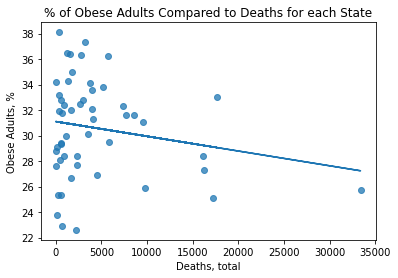

In [301]:
scatter1 = create_scatter(comb_condeaths_all_df['deaths'], comb_condeaths_all_df['% of Obese Adults'], '% of Obese Adults Compared to Deaths for each State', 'Deaths, total', 'Obese Adults, %', 0.75)
# scatter1.plot(backend='plotly')

In [294]:
pd.options.plotting.backend = "plotly"

ValueError: Could not find plotting backend 'plotly'. Ensure that you've installed the package providing the 'plotly' entrypoint, or that the package has a top-level `.plot` method.